In [1]:
import numpy as np 
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

Входные данные: n объектов, каждый из которых характеризуется
двумя числовыми признаками:
Требуется исследовать степень взаимосвязи между двумя
признаками некоторых объектов. Для каждого набора данных
необходимо выполнить следующие задания.
1. Визуализировать данные на плоскости в виде точек
2. Статистически оценить коэффициент корреляции Пирсона
между признаками x и y.
3. Проверить статистическую гипотезу о некоррелированности
признаков x и y на уровне значимости 0,05.
Все описанные выше задания требуется выполнить для двух
наборов данных.
1. Смоделированные независимые случайные вектора
имеющие гауссовское распределение с заданным математическим
ожиданием 'a' и корреляционной матрицей 'R'.
2. Реальные статистические данные из заданного набора
(выдаются преподавателем).
Отчёт кроме прочих обязательных элементов должен включать:
1) изображения данных в виде точек на плоскости;
2) статистические оценки коэффициентов корреляции Пирсона для
каждого набора данных, сравнение статистической оценки
коэффициента корреляции Пирсона с реальным коэффициентом
корреляции Пирсона для смоделированных данных;

In [2]:
n = 1000
a = np.array([-1, 0])
r = np.array([[1, 0.9], [0.9, 2]])
n, a, r

(1000,
 array([-1,  0]),
 array([[1. , 0.9],
        [0.9, 2. ]]))

In [3]:
gendata = np.random.multivariate_normal(mean=a, cov=r, size=n)
gendata

array([[-0.9337133 ,  0.66722389],
       [-0.90023737, -1.22071056],
       [-1.62094102, -1.10811572],
       ...,
       [-1.06579866,  0.3543697 ],
       [-1.95614851, -1.61685092],
       [-1.91279199, -1.44318618]])

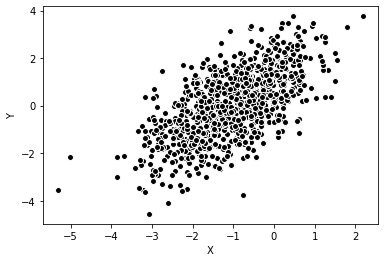

In [4]:
plt.scatter(x=gendata[:,0], y=gendata[:,1], c='black', edgecolors='white')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('data/multinoraml-dist-scatterplot.jpeg', dpi=500)
plt.savefig('data/multinoraml-dist-scatterplot.svg')

In [5]:
corrpearson, p = pearsonr(x=gendata[:,0],y=gendata[:,1])
print(f'corr coeff: {corrpearson}\
\nreal correlation: {r[0, 1] / np.sqrt(r[0, 0] * r[1, 1])}\
\ndiff: {corrpearson - r[0, 1] / np.sqrt(r[0, 0] * r[1, 1])}\
\np-value: {p}')


corr coeff: 0.6317817518124901
real correlation: 0.6363961030678927
diff: -0.00461435125540266
p-value: 1.6068303505446378e-112


In [6]:
ttest_ind(gendata[:,0],gendata[:,1])

Ttest_indResult(statistic=-19.74727168097967, pvalue=1.953493250259269e-79)

In [7]:
birth = pd.read_csv('data/02-birth.txt', sep='\s+', skiprows=[13], header=13) # sep='\s+' - один и более пробелов
birth.head()

,Sex,Gestation,Weight,Length,Head,Chest,Mother.s.age,type,region
1,female,40,2800,50.0,31.0,30.0,25,r,bz
2,female,38,3250,50.0,36.0,35.3,24,r,bz
3,male,39,3100,50.0,33.0,34.0,17,r,bz
4,male,40,4000,53.0,35.0,36.0,41,r,bz
5,male,40,3800,52.0,34.0,35.0,43,r,bz


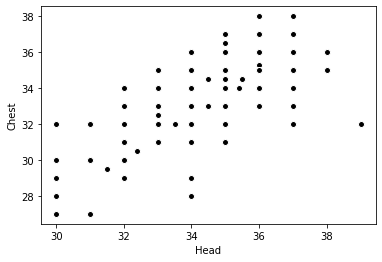

In [8]:
plt.scatter(x=birth.Head, y=birth.Chest, c='black', edgecolors='white')
plt.xlabel('Head')
plt.ylabel('Chest')
plt.savefig('data/birth-scatterplot.jpeg', dpi=500)
plt.savefig('data/birth-scatterplot.svg')

In [9]:
corrpearsonbirth, p = pearsonr(x=birth['Head'].values,y=birth['Chest'].values)
print(f'corr coeff: {corrpearsonbirth}\np-value: {p}')

corr coeff: 0.6685676720438418
p-value: 3.804056856828032e-53


In [10]:
ttest_ind(birth['Head'].values, birth['Chest'].values)

Ttest_indResult(statistic=6.3472541812738195, pvalue=3.673477687821116e-10)